In [31]:
#ИТОГОВАЯ РАБОТА

import numpy as np
import math as mt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sympy import *
from scipy.optimize import differential_evolution, minimize
import random


In [16]:
#Задание №1
#Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])


#Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей
#(ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

userXY = [] #список пар


for i in range(0,len(raitings)):        #берем очередного юзера из 10                        
    for j in range(0,len(raitings)):    #выбираем ему очередного товарища, кроме себя самого
        if j != i:                      #считаем косинусную метрику, заполняем список пар XY с их метриками
            userX = raitings[i]
            userY = raitings[j]
            metrica = np.dot(userX, userY) / (mt.sqrt(np.dot(userX, userX)) * mt.sqrt(np.dot(userY, userY)))
            userXY.append((i, j, metrica))

bestXY = sorted(userXY, key = lambda x: (x[0], x[2]), reverse=True) #группировка массива пар по user:metric 
                                                                    #(получаем metric одного user в порядке 
                                                                    #убывания) 
       
print('Лучшие пары:')
for i in range(0, len(bestXY), 9):      #вывод наиболее похожих пар (лучшая metric для user)
    print(bestXY[i])

#Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, 
#как вы это сделаете?

#применю метод главных компонент (PCA) для оптимизации количества признаковых описаний, в качестве меры возьму
#среднее квадратичное отклонение (MSE)

#plt.figure()
print('\n' + 'Проверка достаточности количества признаков:')
for i in range(0,10):
    pca = PCA(n_components=i)
    pca.fit(raitings)
    paramT = pca.transform(raitings)
    paramBack = pca.inverse_transform(paramT)
    mse = mean_squared_error(raitings, paramBack)
    print(f'количество компонент: {i}, ошибка: {mse}')
    #plt.plot(i, mse, 'o')
    
#в результате, не уверен, что 5 признаков достаточно, т.к. ошибка при этом сравнительно велика, по-моему
#тем не менее, при уменьшении количества признаков до 5, получаем следующий результирующий набор

pca = PCA(n_components=5)
pca.fit(raitings)
paramT = pca.transform(raitings)
print('\n' + 'Новый массив из 5 признаков: ' + '\n' + f'{paramT}')

Лучшие пары:
(9, 2, 0.9187305147356807)
(8, 0, 0.9106598233573044)
(7, 5, 0.8445168512565341)
(6, 3, 0.832742107055763)
(5, 9, 0.8551490764118892)
(4, 8, 0.8794847716076252)
(3, 9, 0.8588686958710952)
(2, 9, 0.9187305147356807)
(1, 4, 0.8713805223930228)
(0, 8, 0.9106598233573044)

Проверка достаточности количества признаков:
количество компонент: 0, ошибка: 7.519333333333334
количество компонент: 1, ошибка: 5.61139667045074
количество компонент: 2, ошибка: 4.129930843805994
количество компонент: 3, ошибка: 3.0687043366351308
количество компонент: 4, ошибка: 2.094471612033206
количество компонент: 5, ошибка: 1.2455442696728187
количество компонент: 6, ошибка: 0.6355156278412625
количество компонент: 7, ошибка: 0.2970720078543606
количество компонент: 8, ошибка: 0.1033134679583121
количество компонент: 9, ошибка: 6.515991077125557e-30

Новый массив из 5 признаков: 
[[-5.30986101  1.92919845 -4.93300027  2.70188013  5.50497886]
 [ 2.87763403  2.71659559  1.40592782  7.26325751 -4.5032229

In [19]:
#Задание №2
#Вычислите производную tg^2(sin(x) + cos(2x+3)) в точке x_0=1 (на python и на бумаге).

Xo = 1

x = symbols('x')
y = tan(sin(x) + cos(2 * x + 3))**2
funcDerivative = diff(y)

print(f'Производная: {funcDerivative}')
print(f'Значение производной в точке Xo=1: {funcDerivative.evalf(subs={x:Xo})}')

handmadeDerivative = (2*mt.cos(Xo)*mt.tan(mt.cos(2*Xo+3)+mt.sin(Xo))-4*mt.sin(2*Xo+3)*mt.tan(mt.cos(2*Xo+3)+mt.sin(Xo)))/mt.cos(mt.cos(2*Xo+3)+sin(Xo))**2
print(f'Значение производной "HANDMADE" в точке Xo=1: {handmadeDerivative}')

Производная: 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
Значение производной в точке Xo=1: 55.3859176353379
Значение производной "HANDMADE" в точке Xo=1: 55.385917635337954


In [47]:
#Задание №3
#Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. 
#Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

#plt.plot(x, fx)
#plt.show()

def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

#params = [(0., 10.), (np.pi, 5*np.pi)]
params = [(-5, 5), (-25, 25)]

result = differential_evolution(error, params, strategy='best1bin')
print(result, '\n')
print(f'Оптимальные параметры "differential_evolution" [a b]: {result.x}', '\n')

result = minimize(error, [0,0], method='COBYLA')
print(result, '\n')
print(f'Оптимальные параметры "minimize" [a b]: {result.x}')

     fun: 1.510904045431971e-06
 message: 'Optimization terminated successfully.'
    nfev: 2343
     nit: 75
 success: True
       x: array([ 3. , -2.5]) 

Оптимальные параметры "differential_evolution" [a b]: [ 3.  -2.5] 

     fun: 0.04807800794774142
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 131
  status: 1
 success: True
       x: array([ 3.00000388, -2.49992627]) 

Оптимальные параметры "minimize" [a b]: [ 3.00000388 -2.49992627]


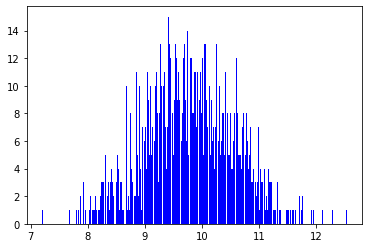

In [21]:
#Задание №4
#Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. 
#Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

randA = list(np.random.randint(low = 0, high = 20, size = 1000))
n, bins, patches = plt.hist([(np.mean(random.sample(randA, 50))) for i in range(0, 1000)], 
                            bins = 300, density = 0, color ='blue',alpha = 1)


In [65]:
#Задание №5
#Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

m = np.array([[1, 4],
              [1, 1]])

w,v = np.linalg.eig(m)
for i in range(len(w)):
    print(f'Cобственное значение: {w[i]}')
    print(f'соответствующий собственный вектор: {v[i]}')

Cобственное значение: 3.0000000000000004
соответствующий собственный вектор: [ 0.89442719 -0.89442719]
Cобственное значение: -0.9999999999999996
соответствующий собственный вектор: [0.4472136 0.4472136]
